<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/Faster%20Optimizers_Learning%20Rate%20Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
%load_ext tensorboard
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

4423680/4422102 [==============================] - 0s 0us/step


# Lab 1: Faster Optimizers

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001,momentum=0.9)

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001,momentum=0.9,nesterov=True)

In [ ]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
# Momentum optimization
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs=10
history = model.fit(X_train_scaled,y_train,epochs=n_epochs,validation_data=(X_valid_scaled,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4908 - accuracy: 0.8274 - val_loss: 0.4088 - val_accuracy: 0.8590
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8660 - val_loss: 0.3749 - val_accuracy: 0.8688
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3440 - accuracy: 0.8777 - val_loss: 0.3701 - val_accuracy: 0.8662
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.8852 - val_loss: 0.3534 - val_accuracy: 0.8784
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.8919 - val_loss: 0.3412 - val_accuracy: 0.8788
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.8972 - val_loss: 0.3343 - val_accuracy: 0.8808
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2736 - accuracy: 0.9018 - val_loss: 0.3333 - val_accuracy:

In [ ]:
#Adom Optimization
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9,beta_2=0.999)

In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs=10
history = model.fit(X_train_scaled,y_train,epochs=n_epochs,validation_data=(X_valid_scaled,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4963 - accuracy: 0.8302 - val_loss: 0.4528 - val_accuracy: 0.8464
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8711 - val_loss: 0.3403 - val_accuracy: 0.8794
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8855 - val_loss: 0.3531 - val_accuracy: 0.8732
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8944 - val_loss: 0.3246 - val_accuracy: 0.8872
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2656 - accuracy: 0.9001 - val_loss: 0.3850 - val_accuracy: 0.8720
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2425 - accuracy: 0.9098 - val_loss: 0.3568 - val_accuracy: 0.8732
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2276 - accuracy: 0.9151 - val_loss: 0.3455 - val_accuracy:

# Lab 2: Learning Rate Scheduling

> 들여쓴 블록

> 들여쓴 블록





## Power Scheduling

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01,decay = 1e-4)

In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs=25
history = model.fit(X_train_scaled,y_train,epochs=n_epochs,validation_data=(X_valid_scaled,y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4867 - accuracy: 0.8277 - val_loss: 0.4107 - val_accuracy: 0.8588
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8654 - val_loss: 0.3893 - val_accuracy: 0.8650
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8768 - val_loss: 0.3608 - val_accuracy: 0.8732
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3243 - accuracy: 0.8842 - val_loss: 0.3603 - val_accuracy: 0.8730
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3089 - accuracy: 0.8903 - val_loss: 0.3518 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8949 - val_loss: 0.3467 - val_accuracy: 0.8778
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2861 - accuracy: 0.8985 - val_loss: 0.3402 - val_accuracy:

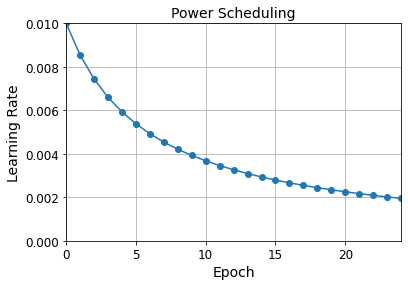

In [ ]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling

In [ ]:
def exponetial_decay(lr0,s):
  def exponential_decay_fn(epoch):
    return lr0*0.1**(epoch/s)
  return exponential_decay_fn

exponential_decay_fn = exponetial_decay(lr0=0.01,s=20)

In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
histroy = model.fit(X_train_scaled,y_train,epochs=n_epochs,
                    validation_data=(X_valid_scaled,y_valid)
                    ,callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8798 - accuracy: 0.7464 - val_loss: 0.8723 - val_accuracy: 0.7094
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7136 - accuracy: 0.7854 - val_loss: 0.5870 - val_accuracy: 0.8088
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5959 - accuracy: 0.8168 - val_loss: 0.6639 - val_accuracy: 0.7944
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5398 - accuracy: 0.8341 - val_loss: 0.6134 - val_accuracy: 0.8168
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5141 - accuracy: 0.8396 - val_loss: 0.5638 - val_accuracy: 0.8260
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4610 - accuracy: 0.8564 - val_loss: 0.5341 - val_accuracy: 0.8460
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8687 - val_loss: 0.5029 - val_accuracy:

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

KeyError: ignored

## Piecewise Constant Scheduling

In [ ]:
def piecewise_constant_fn(epoch):
  if epoch<5:
    return 0.01
  elif epoch<15:
    return 0.005
  else:
    return 0.001


In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
      keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
histroy = model.fit(X_train_scaled,y_train,epochs=n_epochs,validation_data=(X_valid_scaled,y_valid)
                    ,callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8594 - accuracy: 0.7544 - val_loss: 0.7204 - val_accuracy: 0.7656
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8687 - accuracy: 0.7489 - val_loss: 1.0164 - val_accuracy: 0.6970
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8713 - accuracy: 0.7556 - val_loss: 1.0303 - val_accuracy: 0.7222
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8127 - accuracy: 0.7632 - val_loss: 0.9689 - val_accuracy: 0.6836
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8541 - accuracy: 0.7419 - val_loss: 0.8714 - val_accuracy: 0.7186
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8386 - val_loss: 0.5427 - val_accuracy: 0.8466
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4638 - accuracy: 0.8508 - val_loss: 0.5939 - val_accuracy:

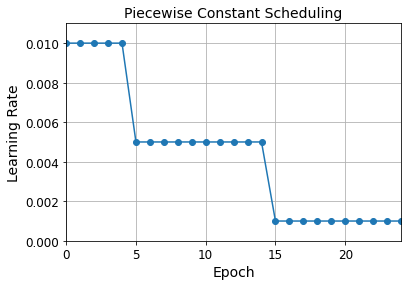

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Lab 3: Regulariziton




In [ ]:
layer = keras.layers.Dense(100,activation="elu",
                           kernel_initializer="he_normal",
                           kernal_regularizer=keras.regularizers.l2(0.01))

TypeError: ignored

In [ ]:
model = keras.models.Sequentizl([
                                 keras.layers.Flatten(input_shape=[28,28])
])